# 05. forcast (시계열 분석)
## 1. prophet 설치 하기
- 윈도우 : Visual buildtools 필요
- `pip install pandas-datareader`
`pip install prophet`

- 예전에는 fbprophet로 불렸으나 변경됨
Prophet is on PyPI, so you can use pip to install it. From v0.6 onwards, Python 2 is no longer supported. As of v1.0, the package name on PyPI is "prophet"; prior to v1.0 it was "fbprophet".

In [1]:
from prophet import Prophet
from pandas_datareader import data

---

## 2. 함수의 실습
- 가장 기초적인 모양 def
- 이름과 입력 인자 설정, 출력 작성

In [2]:
def test_def(a,b):
    return a+b

c=test_def(2,3)
c

5

- 전역 변수 : 함수 밖에서 선언된 변수
- 지역 변수 : 함수 안에서 선언된 변수
- 함수 안에서 선언된 변수는 함수 밖에서 사용 불가

전역변수를 함수 안에서 사용하려면, 함수 안에서 global 키워드 이용

In [3]:
### 전역변수
a = 1

def edit_a(i):
    global a
    a = i

edit_a(2)
a

2

아래 식을 구현
$$ y=asin(2\pi ft + t_0) + b $$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
### 함수로 구현
def plotSinWave(**kwargs):

    ### 기본값 세팅
    amp=kwargs.get("amp",1)
    freq=kwargs.get("freq",1)
    endTime=kwargs.get("endTime",1)
    sampleTime=kwargs.get("sampleTime",0.01)
    startTime=kwargs.get("startTime",0)
    bias=kwargs.get("bias",0)
    figsize=kwargs.get("figsize",(12,8))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time) + bias
    plt.figure(figsize=figsize)
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('sin')
    plt.title (str(amp) + ' * sin(2 * pi * ' + str(freq) + ' * t) + ' + str(bias))
    plt.show()

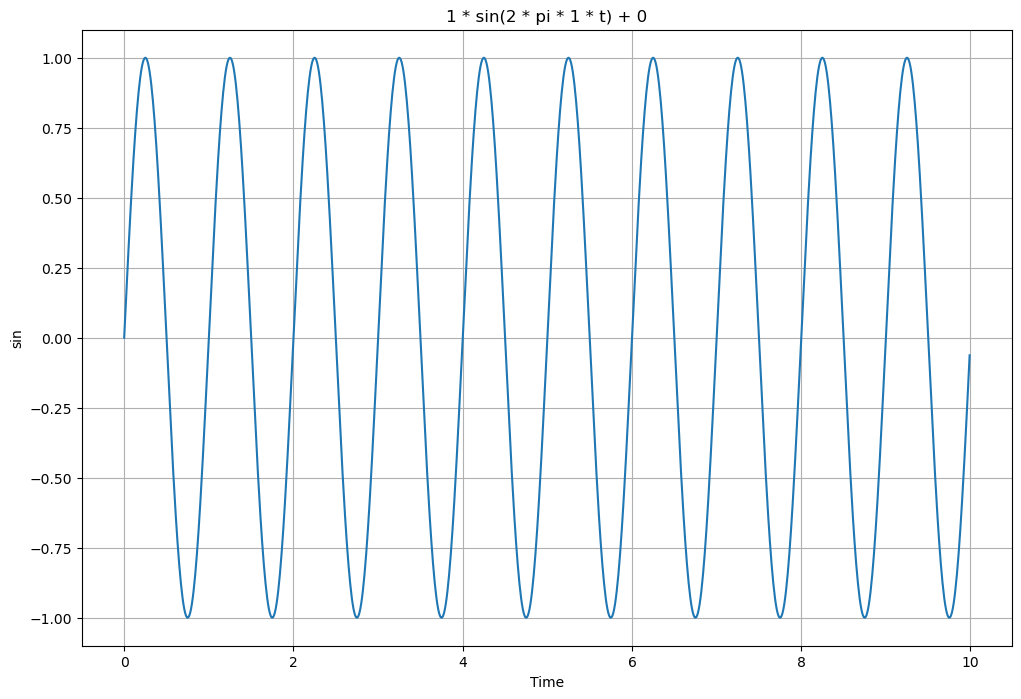

In [12]:
plotSinWave(amp=1, freq=1, endTime=10, sampleTime=0.01, startTime=0, bias=0, figsize=(12,8))

### 함수 import

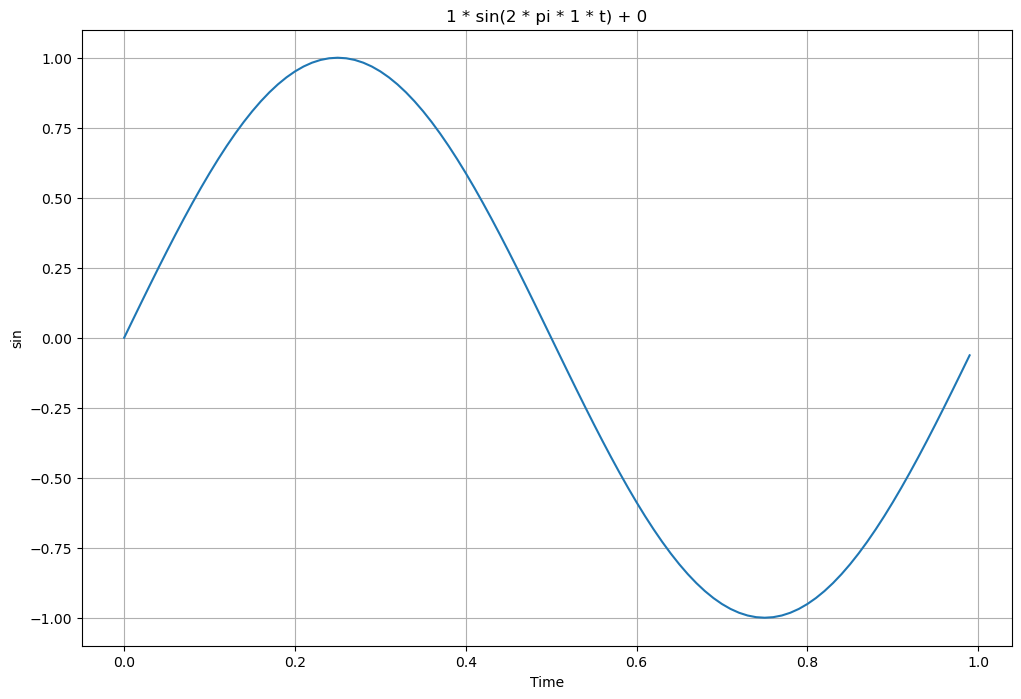

In [13]:
import drawSinWave as dS
dS.plotSinWave()

#### 그래프 한글 설정

In [17]:
%%writefile ./set_matplotlib.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf" # 폰트 경로

if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print("Korean font set to Windows default.")
elif platform.system() == "Darwin":
    rc('font', family='Arial Unicode MS')
    print("Korean font set to Mac default.")
else:
    print("Unknown platform. Korean font may not be set correctly.")

plt.rcParams["axes.unicode_minus"] = False

Overwriting ./set_matplotlib.py


In [18]:
import set_matplotlib

Korean font set to Windows default.


----

## 3. prophet 실습

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
### 그래프를 그릴 데이터 생성
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range(start='2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({"ds" : ds , "y" : result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


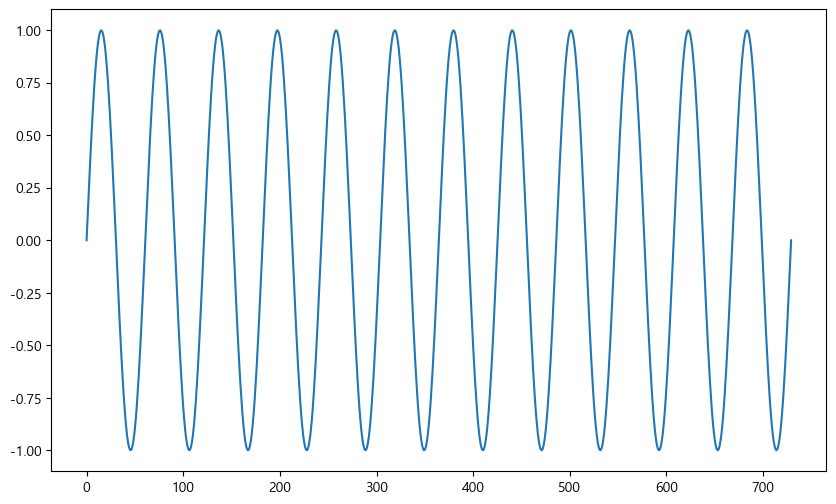

In [23]:
df["y"].plot(figsize=(10,6));

In [25]:
from prophet import Prophet

### 시계열 데이터 학습 - df를 학습 시킴
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

19:29:24 - cmdstanpy - INFO - Chain [1] start processing
19:29:24 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
### 30일간의 데이터 예측
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)

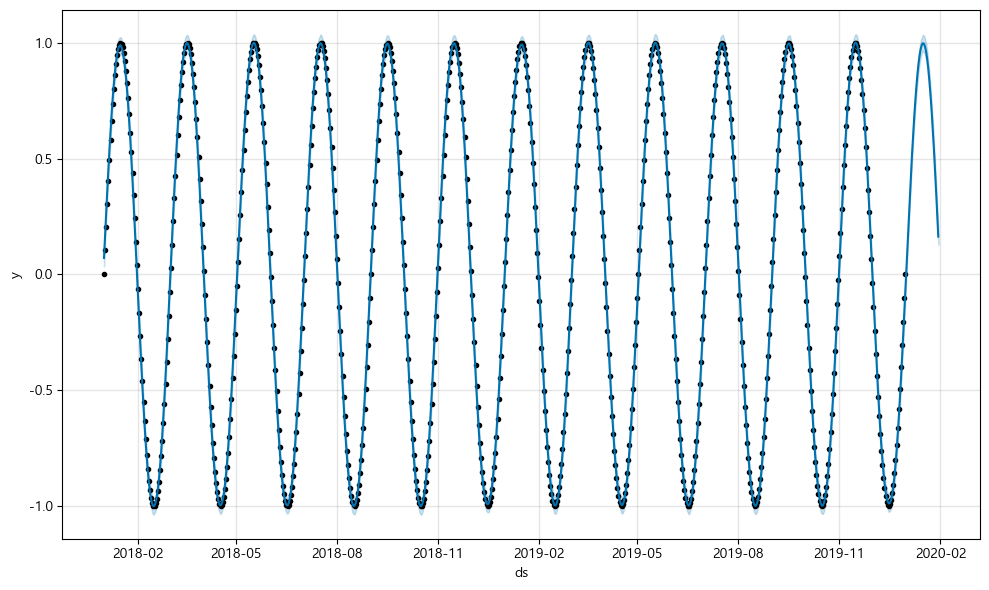

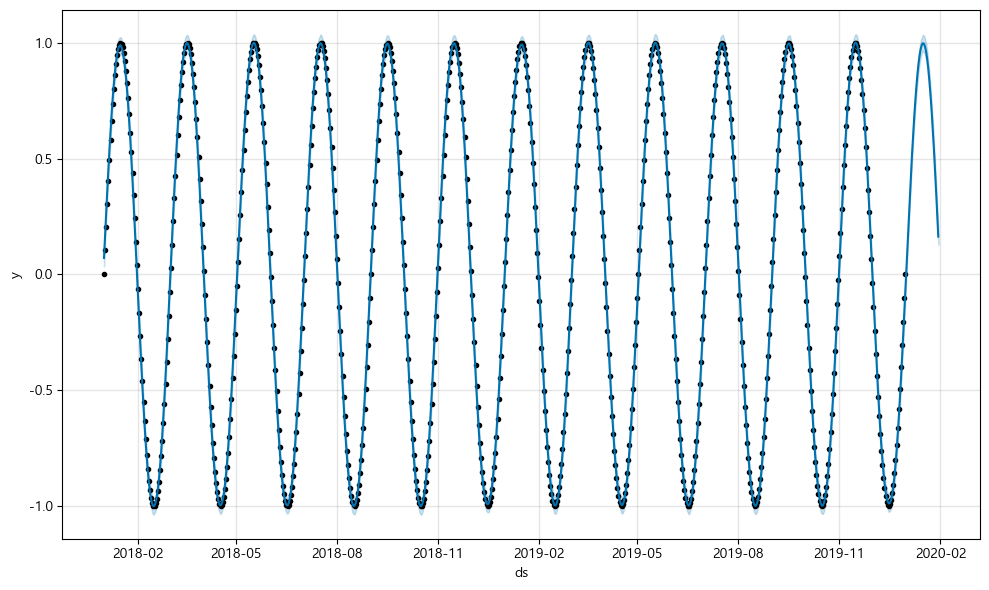

In [29]:
m.plot(forcast)

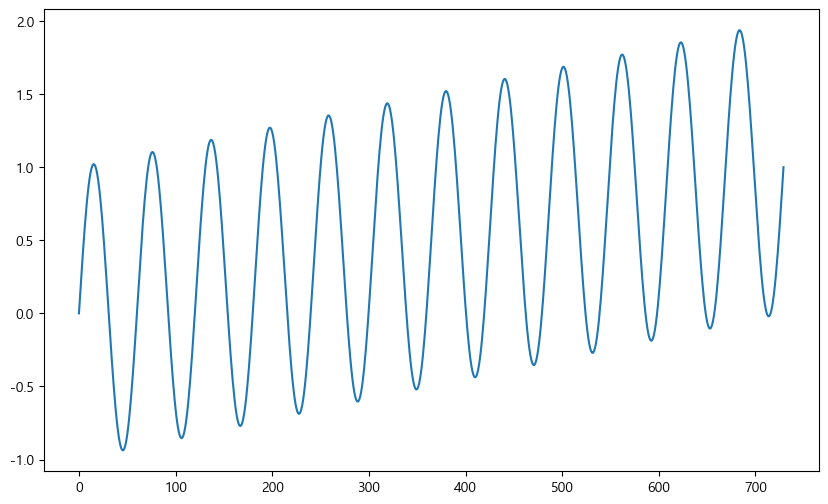

In [31]:
### 그래프를 그릴 데이터 생성
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range(start='2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({"ds" : ds , "y" : result})

df["y"].plot(figsize=(10,6));

19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing


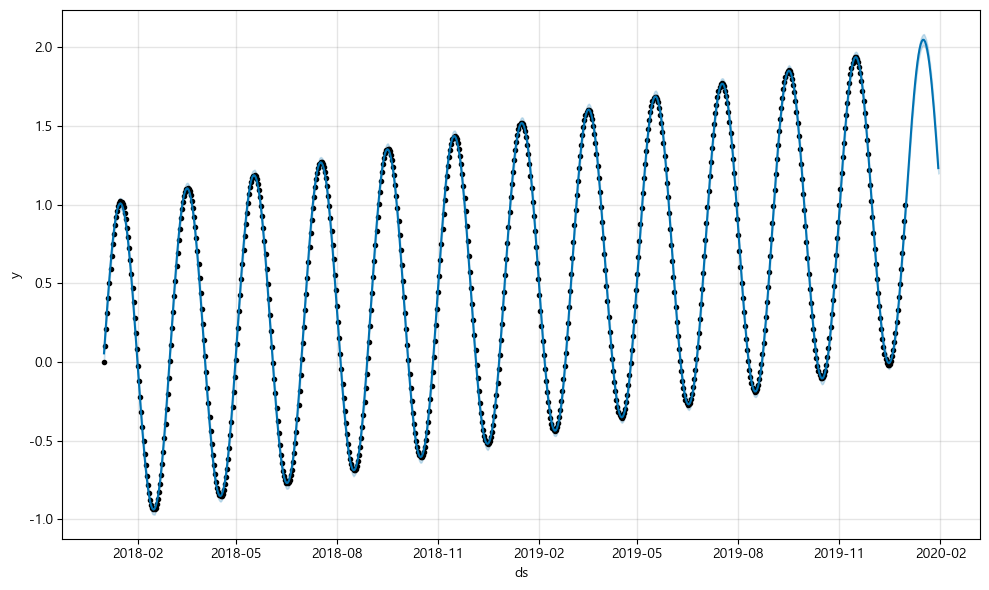

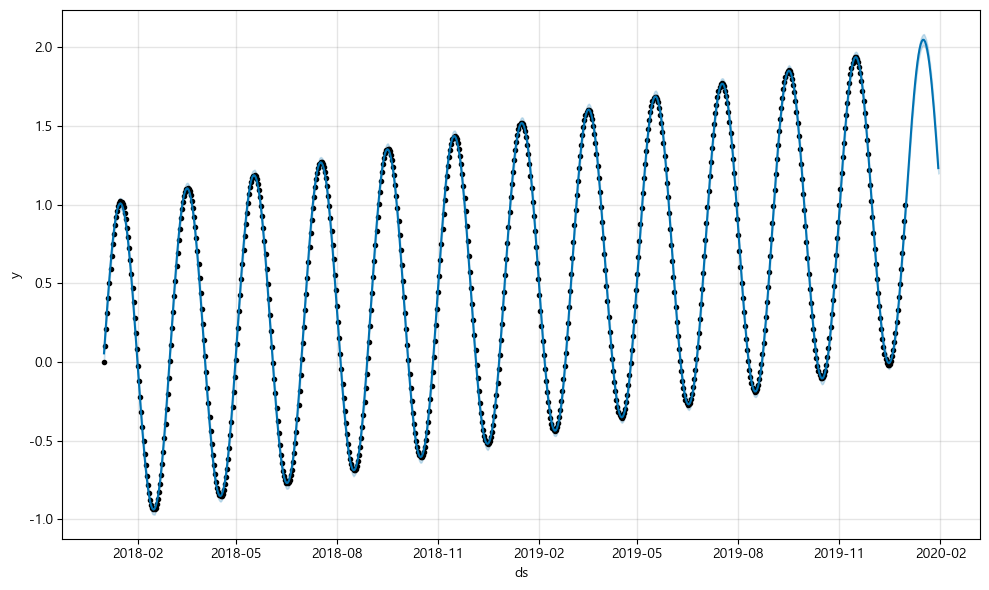

In [32]:
### 시계열 데이터 학습 - df를 학습 시킴
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);


### 30일간의 데이터 예측
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)

### 예측 그래프 그리기
m.plot(forcast)

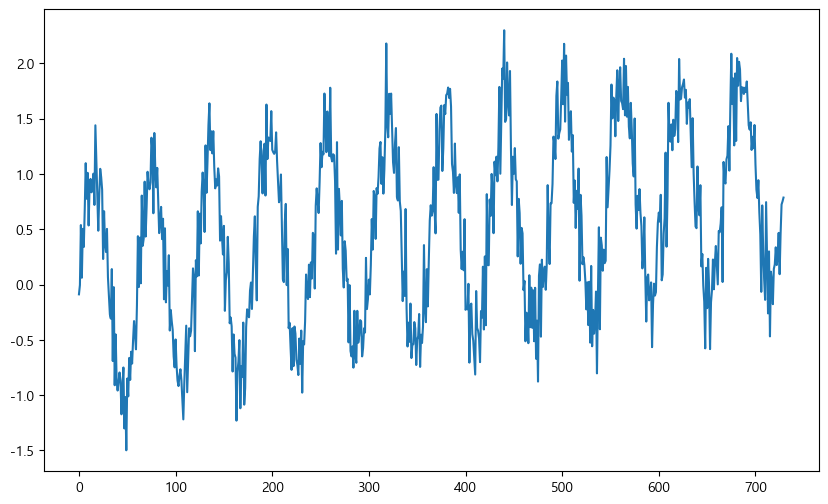

In [34]:
### 랜덤 데이터 추가

### 그래프를 그릴 데이터 생성
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range(start='2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({"ds" : ds , "y" : result})

df["y"].plot(figsize=(10,6));

19:33:49 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing


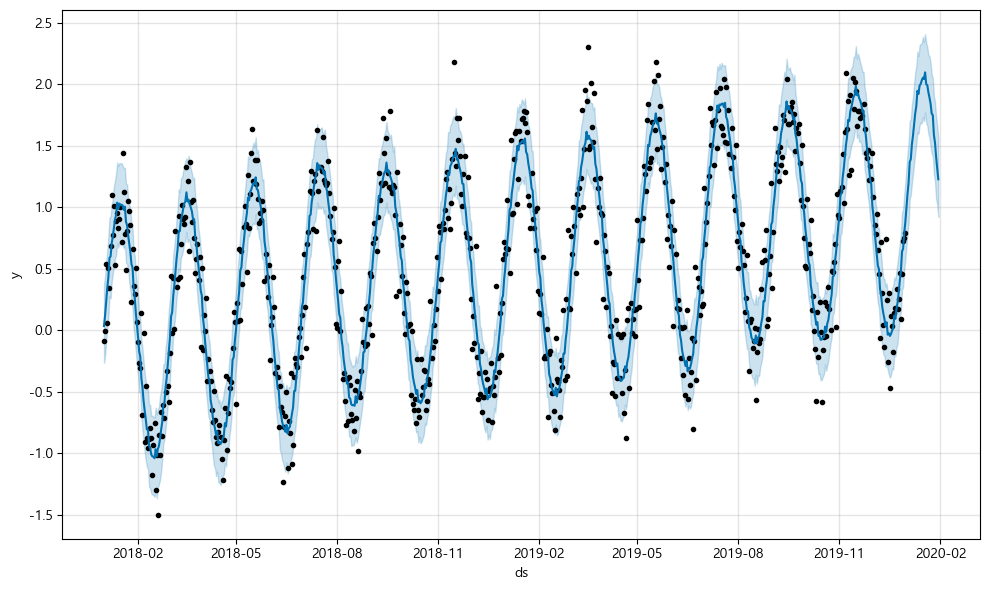

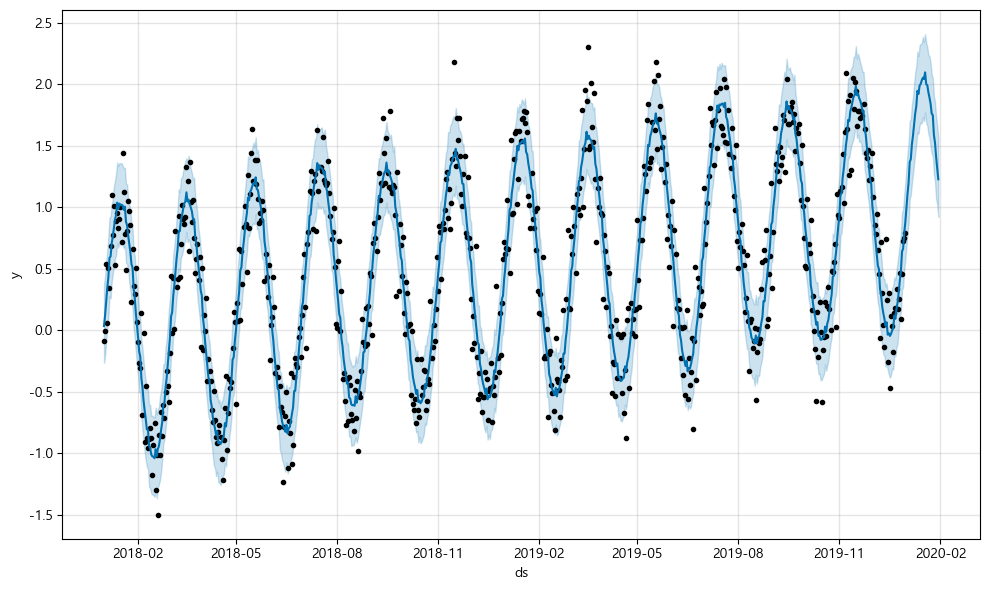

In [35]:
### 시계열 데이터 학습 - df를 학습 시킴
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);


### 30일간의 데이터 예측
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)

### 예측 그래프 그리기
m.plot(forcast)

## 4. prophet의 예제 데이터

In [36]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

%matplotlib inline

In [38]:
### 웹데이터 가져오기
pinkwink_web = pd.read_csv(
    "../../data/05.forcast/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date","hit"],
    index_col=0
)

pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [39]:
### null 값 제거
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


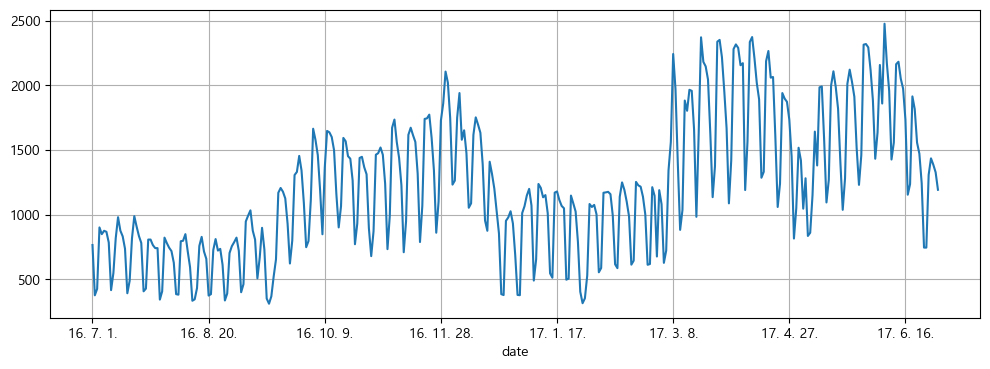

In [41]:
### 데이터 그리기
pinkwink_web["hit"].plot(figsize=(12,4),grid=True);

In [44]:
### 트렌드 분석 시각화를 위한 X축 값 만들기
time = np.arange(0, len(pinkwink_web))
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [45]:
traffic = pinkwink_web["hit"].values
fx = np.linspace(0,time[-1],1000)

In [46]:
### 에러 계산 함수
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [53]:
fp1 = np.polyfit(time,traffic,1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time,traffic,2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time,traffic,3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time,traffic,15)
f15 = np.poly1d(f15p)

In [54]:
print(error(f1,time,traffic))
print(error(f2,time,traffic))
print(error(f3,time,traffic))
print(error(f15,time,traffic))


430.85973081109626
430.6284101894695
429.5328046676293
330.47773079342267


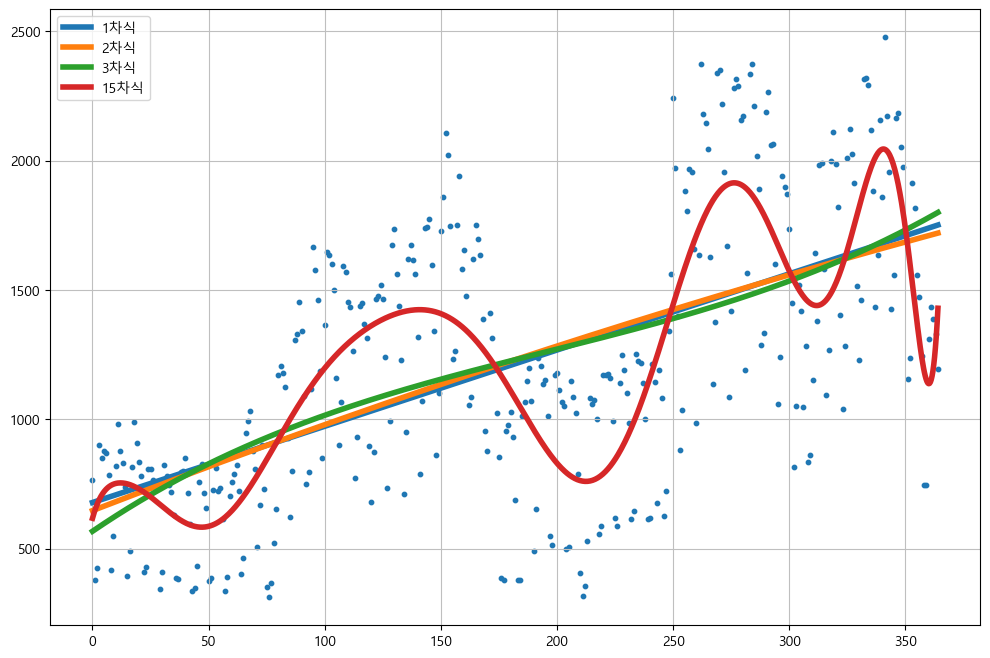

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(time,traffic,s=10)
plt.plot(fx,f1(fx),lw=4, label="1차식")
plt.plot(fx,f2(fx),lw=4, label="2차식")
plt.plot(fx,f3(fx),lw=4, label="3차식")
plt.plot(fx,f15(fx),lw=4, label="15차식")

plt.grid(True, linestyle='-', color="0.75")
plt.legend(loc=2)
plt.show()

In [56]:
### 날짜 형식 변경
df = pd.DataFrame({"ds":pinkwink_web.index, "y":pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [57]:
### prophet 모델 생성
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

19:55:17 - cmdstanpy - INFO - Chain [1] start processing
19:55:17 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
### 60일 데이터 예측 - 예측은 상한 / 하한의 범위를 포함해서 얻어짐
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [60]:
forcast = m.predict(future)
forcast[["ds","yhat","yhat_lower","yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
415,2017-08-20,625.331387,411.463472,830.850914
416,2017-08-21,1181.414762,966.936142,1392.107440
417,2017-08-22,1220.655980,1006.469215,1421.427814
418,2017-08-23,1195.551414,991.315221,1413.149287
419,2017-08-24,1129.491711,923.550479,1331.685618
420,2017-08-25,921.853195,704.168718,1121.008392
421,2017-08-26,506.954908,289.945714,716.199475
422,2017-08-27,639.454293,441.091651,860.831922
423,2017-08-28,1191.944049,986.443488,1408.138135
424,2017-08-29,1227.806799,1024.146349,1452.188000


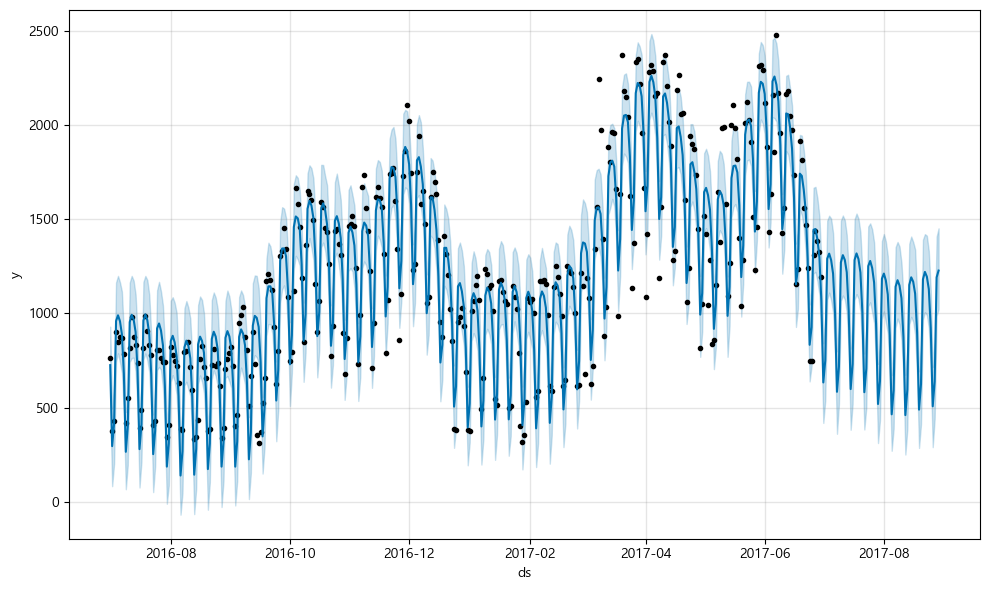

In [61]:
### 예측 그래프
m.plot(forcast);

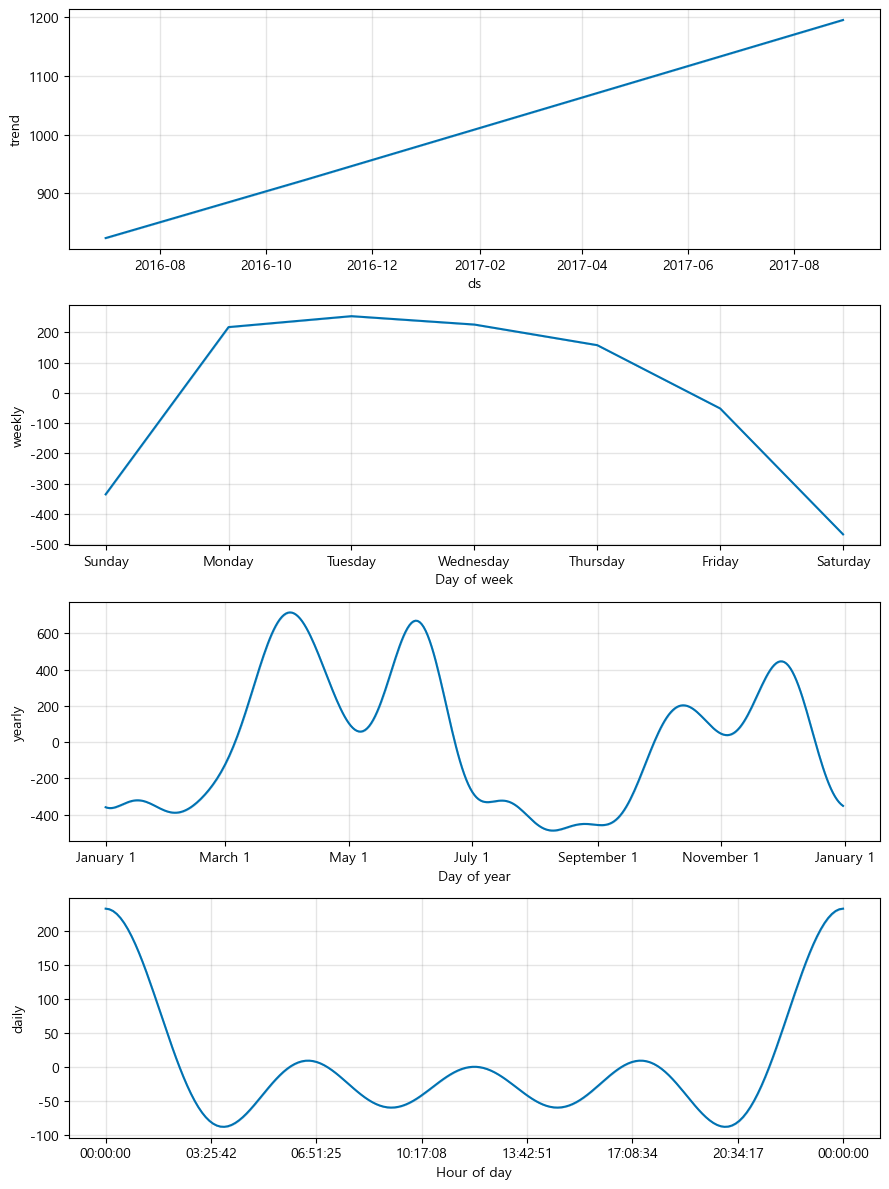

In [62]:
m.plot_components(forcast);